# 05 - Sistema de Coordenadas

Para essa atividade vamos usar o Numpy e Matplotlib. Assim vamos carregar as bibliotecas.

In [1]:
import numpy
import matplotlib.pyplot as plt

Vamos começar essa atividade no espaço 2D. Vamos criar assim algumas funções auxiliares que permitam já configurar um gráfico 2D e desenhar um quadrado em função de suas coordenadas.

In [6]:
# Faz o setup para desenhar gráficos
def graph():
    fig = plt.figure()
    ax = plt.axes()
    plt.grid()
    ax.set_xlim(-2, 5)
    ax.set_ylim(-2, 5)
    ax.axhline(0, color='black') # deixa o X do eixo 0 em destaque
    ax.axvline(0, color='black') # deixa o Y do eixo 0 em destaque
    #ax.set_aspect('equal') # Não suportado em todas as plataformas
    ax.set(xlabel='x', ylabel='y')
    fig.tight_layout()
    return ax

# Desenha um quadrado a partir dos vértices e cor fornecida
def draw_square(points, color="red"):
    plt.scatter(points[0], points[1], s=20, color=color)
    patch = plt.Polygon(points.transpose()[:,0:2], color=color)
    plt.gca().add_patch(patch)

## Transformações Inversas

Vamos começar desenhando um quadrado em 2D pelos seus 4 vértices.

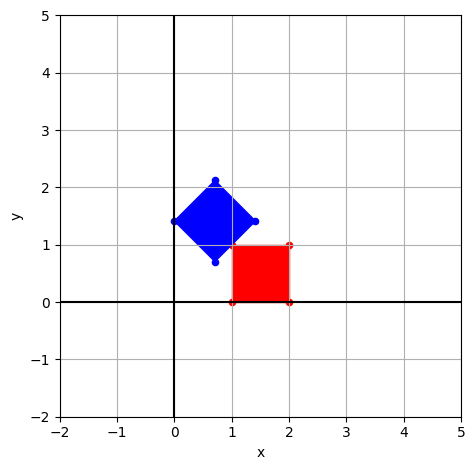

In [7]:
ax = graph() # configura o espaço para desenhar um gráfico 2D

# Pontos originais do vértice de um quadrado exemplo
p_quadrado = numpy.array([[1.0, 2.0, 2.0, 1.0],
                          [0.0, 0.0, 1.0, 1.0]])

# Desenha o quadrado
draw_square(p_quadrado, "red")

# Prepara uma matriz de rotação e aplica nos pontos
angle = numpy.radians(45)
Mrot45 = numpy.array([[numpy.cos(angle), -numpy.sin(angle)],
                    [numpy.sin(angle),  numpy.cos(angle)]])
p_quadrado_rot = numpy.matmul(Mrot45, p_quadrado)

# Desenha o quadrado com os vértice rotacionados
draw_square(p_quadrado_rot, "blue")

plt.show()

A matriz de rotação (Mrot45) criada acima faz uma rotação de 45° no sentido anti-horário, queremos agora voltar o quadrado (seus vértices) para a posição original. Assim, somente usando a matriz de rotação (Mrot45) e os pontos já rotacionados (p_quadrado_rot), crie uma nova matriz que faça os pontos voltarem para a posição original. A proposta dessa atividade é que saiba reverter uma trasnformação (e não aplicar os senos e cossenos para fazer uma nova matriz de rotação no sentido inverso).

In [ ]:
ax = graph() # configura o espaço para desenhar um gráfico 2D

draw_square(p_quadrado_rot, "blue")

# FAÇA AQUI SUA IMPLEMENTAÇÃO

#draw_square(p_quadrado_rot_45, "green")

plt.show()

## Mudança de base

Vamos fazer agora uma mudança de base. Abaixo está um quadrado na base original.

In [ ]:
ax = graph() # configura o espaço para desenhar um gráfico 2D

# Pontos originais do vértice de um quadrado exemplo
p_quadrado = numpy.array([[0.0, 1.0, 1.0, 0.0],
                          [0.0, 0.0, 1.0, 1.0]])

# Desenhando o quadrado
draw_square(p_quadrado, "red")

plt.show()

Leve esse quadrado para uma nova base com origem no (1,1) e vetores u e v respectivamente ($\frac{\sqrt{2}}{2}$, $\frac{\sqrt{2}}{2}$) e (0,-2).

! Para esse exemplo você vai quere usar coordenadas homogêneas.

In [ ]:
ax = graph() # configura o espaço para desenhar um gráfico 2D

o = [1, 1]
u = [numpy.sqrt(2)/2, numpy.sqrt(2)/2]
v = [0, -2]

# FAÇA AQUI SUA IMPLEMENTAÇÃO

plt.show()


## Rotações 3D (Quatérnios)

Vamos ver agora operações no espaço 3D para tratar o nosso mundo de uma câmera no espaço. Para começar vamos criar as funções auxiliares para o espaço 3D.

In [ ]:
# Faz o setup para desenhar gráficos em 3D
def graph3d(c = 1.0):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.set_xlim3d(-4, 4)  # faixa de visualização de X
    ax.set_ylim3d(-4, 4)  # faixa de visualização de Y
    ax.set_zlim3d(-4, 4)  # faixa de visualização de Z
    ax.set_aspect('equal')
    ax.quiver([-c/2,0,0],[0,-c/2,0],[0,0,-c/2],
              [c,0,0],[0,c,0],[0,0,c],
              arrow_length_ratio=0.2, color="grey")
    fig.tight_layout()
    ax.view_init(elev=20.0, azim=30.0,  vertical_axis='y')
    return ax

Vamos fazer uma rotação com quatérnios usando o exemplo fornecido. Assim, crie uma função que recebe o eixo que se deseja rotacionar bem como o ângulo desejado (em radianos) e retorne uma matriz homogênea [4x4] que faça a rotação desejada em pontos no espaço.

In [ ]:
#%matplotlib widget
ax = graph3d() # configura o espaço para desenhar um gráfico 3D

vetor = numpy.array([3, 0, 0])
# Para a operação você vai possivelmente mudar para coordenadas homogêneas

# Desenha vetor exemplo
ax.quiver(0, 0, 0, *vetor)

# FAÇA AQUI SUA IMPLEMENTAÇÃO

# Desenha vetor exemplo rotacionado
#ax.quiver(0, 0, 0, *vetor_rot[:3], color="red")

plt.show()

A função de LookAt serve para ajustar os objetos na cena em função de uma câmera a ser centralizada e reorientada. Use como exemplo uma câmera posicionada nas coordenadas (2, 1, 0) e que rotacionamos 45 graus no sentido horário em Y para que ela fique olhando um objeto a frente dela.

In [ ]:
#%matplotlib widget
ax = graph3d() # configura o espaço para desenhar um gráfico 3D

# Câmera
pos_camera = numpy.array([2.0, 1.0, 0.0])

# ângulo de rotação
angle = numpy.radians(-45)

# rotaciona 45 graus no eixo Y
Mrot45 = numpy.array([[numpy.cos(angle), 0, numpy.sin(angle), 0],
                      [0, 1, 0, 0],
                      [-numpy.sin(angle), 0, numpy.cos(angle), 0],
                      [0, 0, 0, 1]])

# direção padrão da câmera sendo ajustada
dir_camera = numpy.array([0.0, 0.0, -1.0, 0.0])
dir_camera = numpy.matmul(Mrot45, dir_camera.transpose()).transpose()

# desenhando vetor da câmera
ax.quiver(*pos_camera[:3], *dir_camera[:3], color="green")

# Objeto
pos_objeto = numpy.array([3.0, 1.0, -1.0])
ax.scatter(*pos_objeto[:3], color='blue', s=20, marker = "x")

plt.show()

Desenvolva uma função muito simples de lookat.

Crie e aplique uma função lookAt que receba a posição e orientação da câmera (em radianos) e gere a matriz que fará os objetos aparecer como se a câmera estivesse na posição (0,0,0) olhando para o Z negativo.

!Dica: se você fizer de forma correta a atividade, o ponto deverá aparecer um pouco a frente da coordenada (0,0,-1).

In [ ]:
#%matplotlib widget
ax = graph3d() # configura o espaço para desenhar um gráfico 3D

# FAÇA AQUI SUA IMPLEMENTAÇÃO

#ax.scatter(*pos_objeto_look[:3], color='red', s=20, marker = "x")

plt.show()